In [127]:
import pandas as pd
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [558]:
df = pd.read_csv("NortwindTrader.csv", sep=";")

In [437]:
df.head()

,customerID,orderID,orderDate,requiredDate,shippedDate,freight,customerCompanyName,contactName,contactTitle,customerCity,customerCountry,orderdetailUnitPrice,quantity,discount,employeeName,employeeTitle,employeeCity,employeeCountry,reportsTo,productName,quantityPerUnit,productUnitPrice,discontinued,shipperCompanyName,categoryName,description
0,VINET,10248,4.07.2013,1.08.2013,16.07.2013,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,14,12,0,Steven Buchanan,Sales Manager,London,UK,2.0,Queso Cabrales,1 kg pkg.,21,0,Federal Shipping,Dairy Products,Cheeses
1,VINET,10248,4.07.2013,1.08.2013,16.07.2013,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,98,10,0,Steven Buchanan,Sales Manager,London,UK,2.0,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14,1,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal"
2,VINET,10248,4.07.2013,1.08.2013,16.07.2013,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,348,5,0,Steven Buchanan,Sales Manager,London,UK,2.0,Mozzarella di Giovanni,24 - 200 g pkgs.,348,0,Federal Shipping,Dairy Products,Cheeses
3,TOMSP,10249,5.07.2013,16.08.2013,10.07.2013,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,186,9,0,Michael Suyama,Sales Representative,London,UK,5.0,Tofu,40 - 100 g pkgs.,2325,0,Speedy Express,Produce,Dried fruit and bean curd
4,TOMSP,10249,5.07.2013,16.08.2013,10.07.2013,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,424,40,0,Michael Suyama,Sales Representative,London,UK,5.0,Manjimup Dried Apples,50 - 300 g pkgs.,53,0,Speedy Express,Produce,Dried fruit and bean curd


In [343]:
def get_info_about_dataset(dataframe):
    print(45*"#", f"TOTAL NUMBER OF OBSERVATIONS : {dataframe.shape[0]}", 45*"#", 
          sep='\n', end = '\n\n')
    print(45*"#", f"NUMBER OF VARIABLES: {dataframe.shape[1]}", 45*"#", 
          sep='\n', end = '\n\n')
    print(45*"#", "TOTAL MISSING VALUES FOR EACH VARIABLE", 45*"#", dataframe.isnull().sum(), 
          sep='\n', end = '\n\n')
    print(45*"#", "TYPES OF VARIABLES", 45*"#", dataframe.dtypes, 
          sep='\n', end = '\n\n')
    print(45*"#", "DESCRIPTIVE STATISTICS OF NUMERICAL VARIABLES", 45*"#", dataframe.describe().T, 
          sep='\n', end = '\n\n')
    print(45*"#", "DESCRIPTIVE STATISTICS OF CATEGORY VARIABLES", 45*"#", dataframe.describe(include=object).T, 
          sep='\n', end = '\n\n')

In [344]:
get_info_about_dataset(df)

#############################################
TOTAL NUMBER OF OBSERVATIONS : 2155
#############################################

#############################################
NUMBER OF VARIABLES: 26
#############################################

#############################################
TOTAL MISSING VALUES FOR EACH VARIABLE
#############################################
customerID                0
orderID                   0
orderDate                 0
requiredDate              0
shippedDate              73
freight                   0
customerCompanyName       0
contactName               0
contactTitle              0
customerCity              0
customerCountry           0
orderdetailUnitPrice      0
quantity                  0
discount                  0
employeeName              0
employeeTitle             0
employeeCity              0
employeeCountry           0
reportsTo               241
productName               0
quantityPerUnit           0
productUnitPrice          0
discont

In [559]:
def grab_col_names(dataframe, cat_th=5, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, num_but_cat

cat_cols, num_cols, num_but_cat = grab_col_names(df)

Observations: 2155
Variables: 26
cat_cols: 18
num_cols: 6
num_but_cat: 2


In [358]:
print("Numeric but Cardinal:")
for i in num_but_cat:
    print("\t" + i)

Numeric but Cardinal:
	reportsTo
	discontinued
	orderDateYear
	requiredDateYear
	shippedDateYear


In [359]:
print("Numerical Variable:")
for i in num_cols:
    print("\t" + i)

Numerical Variable:
	orderID
	freight
	orderdetailUnitPrice
	quantity
	discount
	productUnitPrice


In [360]:
print("Categorical Variable:")
for i in cat_cols:
    print("\t" + i)

Categorical Variable:
	customerID
	customerCompanyName
	contactName
	contactTitle
	customerCity
	customerCountry
	employeeName
	employeeTitle
	employeeCity
	employeeCountry
	productName
	quantityPerUnit
	shipperCompanyName
	categoryName
	description
	orderDateMonth
	orderDateDay
	requiredDateMonth
	requiredDateDay
	shippedDateMonth
	shippedDateDay


Feature Engineering

In [560]:
date_columns = ['orderDate', 'requiredDate', 'shippedDate']

In [561]:
for column in date_columns:
    df[column] = pd.to_datetime(df[column])

In [562]:
for col in date_columns:
    df[f"{col}Year"] = df[col].dt.year
    df[f"{col}Month"] = df[col].dt.strftime('%B')
    df[f"{col}Day"] = df[col].dt.strftime('%A')

In [442]:
df.head()

,customerID,orderID,orderDate,requiredDate,shippedDate,freight,customerCompanyName,contactName,contactTitle,customerCity,customerCountry,orderdetailUnitPrice,quantity,discount,employeeName,employeeTitle,employeeCity,employeeCountry,reportsTo,productName,quantityPerUnit,productUnitPrice,discontinued,shipperCompanyName,categoryName,description,orderDateYear,orderDateMonth,orderDateDay,requiredDateYear,requiredDateMonth,requiredDateDay,shippedDateYear,shippedDateMonth,shippedDateDay
0,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,14,12,0,Steven Buchanan,Sales Manager,London,UK,2.0,Queso Cabrales,1 kg pkg.,21,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday
1,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,98,10,0,Steven Buchanan,Sales Manager,London,UK,2.0,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14,1,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal",2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday
2,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,348,5,0,Steven Buchanan,Sales Manager,London,UK,2.0,Mozzarella di Giovanni,24 - 200 g pkgs.,348,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday
3,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,186,9,0,Michael Suyama,Sales Representative,London,UK,5.0,Tofu,40 - 100 g pkgs.,2325,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday
4,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,424,40,0,Michael Suyama,Sales Representative,London,UK,5.0,Manjimup Dried Apples,50 - 300 g pkgs.,53,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday


In [563]:
df.rename({"customerID": "Customer ID","orderID" : "Order ID","orderDate" : "Order Date","requiredDate" : "Required Date",
           "shippedDate" :"Shipped Date","freight":"Freight","customerCompanyName" : "Customer Company Name",
          "contactName" : "Contact Name", "contactTitle" : "Contact Title", "customerCity" : "Customer City",
          "customerCountry" : "Customer Country","orderdetailUnitPrice" : "Unit Price from Order Details",
          "quantity" : "Quantity","discount" : "Discount","employeeName" : "Employee Name",
          "employeeTitle" : "Employee Title","employeeCity" : "Employee City", "employeeCountry" : "Employee Country",
          "reportsTo" : "Reports To","productName" :"Product Name" ,"quantityPerUnit" :"Quantity Per Unit ",
          "productUnitPrice" :  "Product of Unit Price","discontinued" : "Discontinued",
          "shipperCompanyName" : "Company Name of Shipper","categoryName" : "Category Name",
          "description" :"Description" ,"orderDateYear" :"Year of Order Date"
          ,"orderDateMonth" :"Month of Order Date","orderDateDay" : "Day of Order Date",
          "requiredDateYear" : "Year of Required Date","requiredDateMonth" :"Month of Required Date",
          "requiredDateDay" : "Day of Required Date","shippedDateYear" : "Year of Shipped Date",
          "shippedDateMonth" : "Month of Shipped Date","shippedDateDay" : "Day of Shipped Date"}
          ,axis=1, inplace=True)

In [453]:
df.head()

,Customer ID,Order ID,Order Date,Required Date,Shipped Date,Freight,Customer Company Name,Contact Name,Contact Title,Customer City,Customer Country,Unit Price from Order Details,Quantity,Discount,Employee Name,Employee Title,Employee City,Employee Country,Reports To,Product Name,Quantity Per Unit,Product of Unit Price,Discontinued,Company Name of Shipper,Category Name,Description,Year of Order Date,Month of Order Date,Day of Order Date,Year of Required Date,Month of Required Date,Day of Required Date,Year of Shipped Date,Month of Shipped Date,Day of Shipped Date,Total Price,Current Total Price
0,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,14,12,0,Steven Buchanan,Sales Manager,London,UK,2.0,Queso Cabrales,1 kg pkg.,21,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,168,252
1,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,98,10,0,Steven Buchanan,Sales Manager,London,UK,2.0,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14,1,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal",2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,980,140
2,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,348,5,0,Steven Buchanan,Sales Manager,London,UK,2.0,Mozzarella di Giovanni,24 - 200 g pkgs.,348,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,1740,1740
3,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,186,9,0,Michael Suyama,Sales Representative,London,UK,5.0,Tofu,40 - 100 g pkgs.,2325,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,1674,20925
4,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,424,40,0,Michael Suyama,Sales Representative,London,UK,5.0,Manjimup Dried Apples,50 - 300 g pkgs.,53,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,16960,2120


In [564]:
cat_cols, num_cols, num_but_cat = grab_col_names(df)

Observations: 2155
Variables: 35
cat_cols: 21
num_cols: 9
num_but_cat: 5


In [455]:
print("Unique Count of Categorical Variable:")
for i in cat_cols:
    unique_count = df[i].nunique()
    print(f"\t{i}: {unique_count}")

Unique Count of Categorical Variable:
	Customer ID: 89
	Customer Company Name: 89
	Contact Name: 89
	Contact Title: 12
	Customer City: 69
	Customer Country: 21
	Employee Name: 9
	Employee Title: 3
	Employee City: 2
	Employee Country: 2
	Product Name: 77
	Quantity Per Unit : 70
	Company Name of Shipper: 3
	Category Name: 8
	Description: 8
	Month of Order Date: 12
	Day of Order Date: 7
	Month of Required Date: 12
	Day of Required Date: 7
	Month of Shipped Date: 12
	Day of Shipped Date: 7


In [456]:
print("Unique Count of Numeric Variable:")
for i in num_cols:
    unique_count = df[i].nunique()
    print(f"\t{i}: {unique_count}")

Unique Count of Numeric Variable:
	Order ID: 830
	Order Date: 480
	Required Date: 454
	Shipped Date: 387
	Freight: 788
	Unit Price from Order Details: 114
	Quantity: 55
	Discount: 9
	Product of Unit Price: 61
	Total Price: 900
	Current Total Price: 764


In [565]:
df["Total Price"]= df["Unit Price from Order Details"]*df["Quantity"]

In [566]:
df["Current Total Price"]= df["Product of Unit Price"]*df["Quantity"]

In [457]:
df.head()

,Customer ID,Order ID,Order Date,Required Date,Shipped Date,Freight,Customer Company Name,Contact Name,Contact Title,Customer City,Customer Country,Unit Price from Order Details,Quantity,Discount,Employee Name,Employee Title,Employee City,Employee Country,Reports To,Product Name,Quantity Per Unit,Product of Unit Price,Discontinued,Company Name of Shipper,Category Name,Description,Year of Order Date,Month of Order Date,Day of Order Date,Year of Required Date,Month of Required Date,Day of Required Date,Year of Shipped Date,Month of Shipped Date,Day of Shipped Date,Total Price,Current Total Price
0,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,14,12,0,Steven Buchanan,Sales Manager,London,UK,2.0,Queso Cabrales,1 kg pkg.,21,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,168,252
1,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,98,10,0,Steven Buchanan,Sales Manager,London,UK,2.0,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14,1,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal",2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,980,140
2,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,348,5,0,Steven Buchanan,Sales Manager,London,UK,2.0,Mozzarella di Giovanni,24 - 200 g pkgs.,348,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,1740,1740
3,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,186,9,0,Michael Suyama,Sales Representative,London,UK,5.0,Tofu,40 - 100 g pkgs.,2325,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,1674,20925
4,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,424,40,0,Michael Suyama,Sales Representative,London,UK,5.0,Manjimup Dried Apples,50 - 300 g pkgs.,53,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,16960,2120


Missing Values Analysis

In [567]:
df.isnull().sum()

Customer ID                        0
Order ID                           0
Order Date                         0
Required Date                      0
Shipped Date                      73
Freight                            0
Customer Company Name              0
Contact Name                       0
Contact Title                      0
Customer City                      0
Customer Country                   0
Unit Price from Order Details      0
Quantity                           0
Discount                           0
Employee Name                      0
Employee Title                     0
Employee City                      0
Employee Country                   0
Reports To                       241
Product Name                       0
Quantity Per Unit                  0
Product of Unit Price              0
Discontinued                       0
Company Name of Shipper            0
Category Name                      0
Description                        0
Year of Order Date                 0
M

Since the shipped date is blank here, it is predicted that these orders were not delivered or canceled. These rows will be removed from the data set.

In [568]:
df.dropna(subset=["Shipped Date"], inplace=True)

In [569]:
df.isnull().sum()

Customer ID                        0
Order ID                           0
Order Date                         0
Required Date                      0
Shipped Date                       0
Freight                            0
Customer Company Name              0
Contact Name                       0
Contact Title                      0
Customer City                      0
Customer Country                   0
Unit Price from Order Details      0
Quantity                           0
Discount                           0
Employee Name                      0
Employee Title                     0
Employee City                      0
Employee Country                   0
Reports To                       232
Product Name                       0
Quantity Per Unit                  0
Product of Unit Price              0
Discontinued                       0
Company Name of Shipper            0
Category Name                      0
Description                        0
Year of Order Date                 0
M

In [470]:
df["Reports To"].value_counts()

8.0    1044
5.0     439
2.0     367
Name: Reports To, dtype: int64

In [474]:
df[df["Reports To"].isna()].head()

,Customer ID,Order ID,Order Date,Required Date,Shipped Date,Freight,Customer Company Name,Contact Name,Contact Title,Customer City,Customer Country,Unit Price from Order Details,Quantity,Discount,Employee Name,Employee Title,Employee City,Employee Country,Reports To,Product Name,Quantity Per Unit,Product of Unit Price,Discontinued,Company Name of Shipper,Category Name,Description,Year of Order Date,Month of Order Date,Day of Order Date,Year of Required Date,Month of Required Date,Day of Required Date,Year of Shipped Date,Month of Shipped Date,Day of Shipped Date,Total Price,Current Total Price
49,BLONP,10265,2013-07-25,2013-08-22,2013-12-08,5528,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,Strasbourg,France,312,30,0,Andrew Fuller,Vice President Sales,New York,USA,NaN,Alice Mutton,20 - 1 kg tins,39,1,Speedy Express,Meat & Poultry,Prepared meats,2013,July,Thursday,2013,August,Thursday,2013.0,December,Sunday,9360,1170
50,BLONP,10265,2013-07-25,2013-08-22,2013-12-08,5528,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,Strasbourg,France,12,20,0,Andrew Fuller,Vice President Sales,New York,USA,NaN,Outback Lager,24 - 355 ml bottles,15,0,Speedy Express,Beverages,"Soft drinks, coffees, teas, beers, and ales",2013,July,Thursday,2013,August,Thursday,2013.0,December,Sunday,240,300
76,MORGK,10277,2013-09-08,2013-06-09,2013-08-13,12577,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Leipzig,Germany,364,20,0,Andrew Fuller,Vice President Sales,New York,USA,NaN,Rössle Sauerkraut,25 - 825 g cans,456,1,Federal Shipping,Produce,Dried fruit and bean curd,2013,September,Sunday,2013,June,Sunday,2013.0,August,Tuesday,7280,9120
77,MORGK,10277,2013-09-08,2013-06-09,2013-08-13,12577,Morgenstern Gesundkost,Alexander Feuer,Marketing Assistant,Leipzig,Germany,394,12,0,Andrew Fuller,Vice President Sales,New York,USA,NaN,Tarte au sucre,48 pies,493,0,Federal Shipping,Confections,"Desserts, candies, and sweet breads",2013,September,Sunday,2013,June,Sunday,2013.0,August,Tuesday,4728,5916
83,BERGS,10280,2013-08-14,2013-11-09,2013-12-09,898,Berglunds snabbköp,Christina Berglund,Order Administrator,Luleå,Sweden,36,12,0,Andrew Fuller,Vice President Sales,New York,USA,NaN,Guarana Fantastica,12 - 355 ml cans,45,1,Speedy Express,Beverages,"Soft drinks, coffees, teas, beers, and ales",2013,August,Wednesday,2013,November,Saturday,2013.0,December,Monday,432,540


Assuming that Employee Andrew Fuller does not report to anyone, the nan values in the reports to column will be filled with 

In [570]:
df["Reports To"].fillna(0, inplace=True)

In [476]:
df.isnull().sum()

Customer ID                      0
Order ID                         0
Order Date                       0
Required Date                    0
Shipped Date                     0
Freight                          0
Customer Company Name            0
Contact Name                     0
Contact Title                    0
Customer City                    0
Customer Country                 0
Unit Price from Order Details    0
Quantity                         0
Discount                         0
Employee Name                    0
Employee Title                   0
Employee City                    0
Employee Country                 0
Reports To                       0
Product Name                     0
Quantity Per Unit                0
Product of Unit Price            0
Discontinued                     0
Company Name of Shipper          0
Category Name                    0
Description                      0
Year of Order Date               0
Month of Order Date              0
Day of Order Date   

In [477]:
df.head()

,Customer ID,Order ID,Order Date,Required Date,Shipped Date,Freight,Customer Company Name,Contact Name,Contact Title,Customer City,Customer Country,Unit Price from Order Details,Quantity,Discount,Employee Name,Employee Title,Employee City,Employee Country,Reports To,Product Name,Quantity Per Unit,Product of Unit Price,Discontinued,Company Name of Shipper,Category Name,Description,Year of Order Date,Month of Order Date,Day of Order Date,Year of Required Date,Month of Required Date,Day of Required Date,Year of Shipped Date,Month of Shipped Date,Day of Shipped Date,Total Price,Current Total Price
0,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,14,12,0,Steven Buchanan,Sales Manager,London,UK,2.0,Queso Cabrales,1 kg pkg.,21,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,168,252
1,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,98,10,0,Steven Buchanan,Sales Manager,London,UK,2.0,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14,1,Federal Shipping,Grains & Cereals,"Breads, crackers, pasta, and cereal",2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,980,140
2,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,348,5,0,Steven Buchanan,Sales Manager,London,UK,2.0,Mozzarella di Giovanni,24 - 200 g pkgs.,348,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,1740,1740
3,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,186,9,0,Michael Suyama,Sales Representative,London,UK,5.0,Tofu,40 - 100 g pkgs.,2325,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,1674,20925
4,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,424,40,0,Michael Suyama,Sales Representative,London,UK,5.0,Manjimup Dried Apples,50 - 300 g pkgs.,53,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,16960,2120


In [483]:
df.groupby("Discount").agg({"Total Price" : "sum", "Quantity" :"count"}).sort_values(by="Total Price", ascending=False)

,Total Price,Quantity
Discount,,
0,12860331,1279
25,3760487,149
5,2540794,177
1,1622368,172
2,1425846,157
15,1155913,148


In [491]:
df.loc[df["Discontinued"] == 1, "Product Name"].unique()

array(['Singaporean Hokkien Fried Mee', 'Guarana Fantastica',
       'Perth Pasties', "Chef Anton's Gumbo Mix", 'Alice Mutton',
       'Thüringer Rostbratwurst', 'Rössle Sauerkraut', 'Mishi Kobe Niku'],
      dtype=object)

In [571]:
df = df.loc[df["Discontinued"] != 1]

In [572]:
df.shape

(1861, 37)

In [494]:
df.groupby("Product Name").agg({"Total Price" : "sum"}).sort_values(by="Total Price", ascending=False).head(10)

,Total Price
Product Name,
Côte de Blaye,1499842
Gumbär Gummibärchen,1452057
Wimmers gute Semmelknödel,1287440
Pavlova,1280374
Nord-Ost Matjeshering,1083420
Louisiana Fiery Hot Pepper Sauce,1078164
Rhönbräu Klosterbier,753703
Jack's New England Clam Chowder,737338
Gula Malacca,640895


In [495]:
df.groupby("Customer ID").agg({"Total Price" : "sum"}).sort_values(by="Total Price", ascending=False).head(10)

,Total Price
Customer ID,
QUICK,1628764
SAVEA,1186050
ERNSH,1020150
HUNGO,778345
FRANK,585023
HILAA,493480
KOENE,470942
BERGS,457167
QUEEN,421354


In [496]:
df.groupby("Employee Name").agg({"Total Price" : "sum"}).sort_values(by="Total Price", ascending=False).head(10)

,Total Price
Employee Name,
Janet Leverling,3190970
Nancy Davolio,2303188
Margaret Peacock,2288036
Andrew Fuller,1668765
Laura Callahan,1660771
Robert King,1291753
Michael Suyama,1099646
Steven Buchanan,1015623
Anne Dodsworth,873473


In [497]:
df.groupby("Company Name of Shipper").agg({"Total Price" : "sum"}).sort_values(by="Total Price", ascending=False).head(10)

,Total Price
Company Name of Shipper,
United Package,5560667
Speedy Express,4956843
Federal Shipping,4874715


In [498]:
df.groupby("Customer Country").agg({"Total Price" : "sum"}).sort_values(by="Total Price", ascending=False).head(10)

,Total Price
Customer Country,
Germany,3584732
USA,2829150
Brazil,1401088
Austria,1383434
Venezuela,925719
France,836549
Ireland,778345
Sweden,649993
Canada,420354


In [499]:
df.groupby("Category Name").agg({"Total Price" : "sum"}).sort_values(by="Total Price", ascending=False).head(10)

,Total Price
Category Name,
Confections,3949147
Seafood,2975459
Beverages,2641431
Condiments,2183740
Grains & Cereals,1544602
Dairy Products,988543
Produce,687454
Meat & Poultry,421849


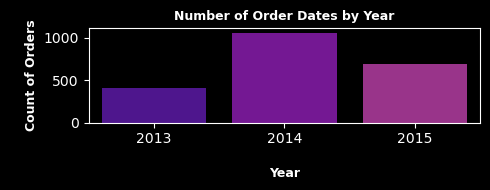

In [500]:
NumberofOrderDatesbyYear = df.groupby('Year of Order Date')['Total Price'].sum()

plt.style.use('dark_background')
plt.figure(figsize=(5,2))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(x=YearofOrderPerDate.index,y=YearofOrderPerDate.values, palette=colors)
plt.title("Number of Order Dates by Year",fontsize=9,fontweight="bold")
plt.xlabel("\nYear", fontsize=9, fontweight="bold")
plt.ylabel("\nCount of Orders", fontsize=9, fontweight="bold")
plt.tight_layout()
plt.show()

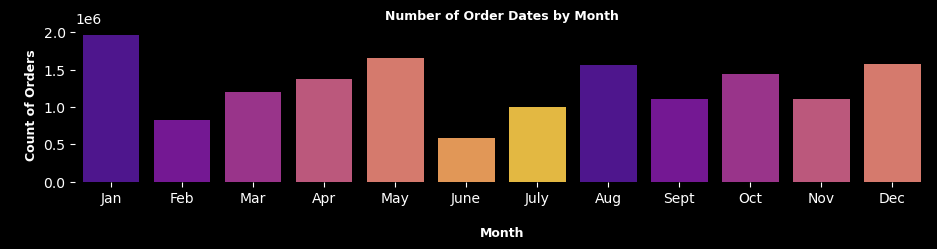

In [501]:
NumberofOrderDatesbyMonth = df.groupby('Month of Order Date')['Total Price'].sum()

plt.style.use('dark_background')
plt.figure(figsize=(11,2))
colors = sns.color_palette("plasma", n_colors=7)
ax = sns.barplot(x=NumberofOrderDatesbyMonth.index,y=NumberofOrderDatesbyMonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]
ax.set_xticklabels(group_labels)
plt.title("Number of Order Dates by Month",fontsize=9,fontweight="bold")
plt.xlabel("\nMonth", fontsize=9, fontweight="bold")
plt.ylabel("\nCount of Orders", fontsize=9, fontweight="bold")
plt.show()

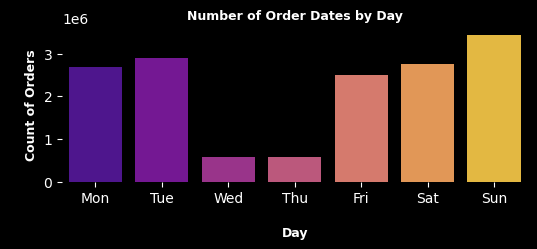

In [502]:
NumberofOrderDatesbyDay = df.groupby('Day of Order Date')['Total Price'].sum()

plt.style.use('dark_background')
plt.figure(figsize=(6,2))
colors = sns.color_palette("plasma", n_colors=7)
ax = sns.barplot(x=NumberofOrderDatesbyDay.index,y=NumberofOrderDatesbyDay.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
group_labels = ['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(group_labels)
plt.title("Number of Order Dates by Day",fontsize=9,fontweight="bold")
plt.xlabel("\nDay", fontsize=9, fontweight="bold")
plt.ylabel("\nCount of Orders", fontsize=9, fontweight="bold")
plt.show()

In [573]:
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [574]:
df["Month of Order Date2"] = df["Month of Order Date"].map(month_to_number)

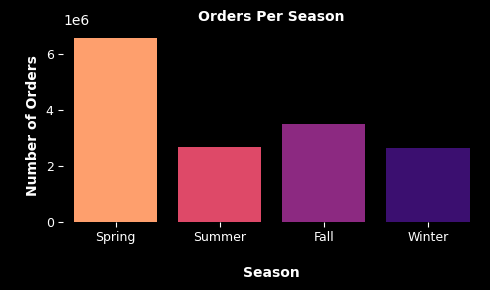

In [575]:
bins = [1, 4, 7, 10, 13]
labels = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.cut(df['Month of Order Date2'], bins=bins, labels=labels, include_lowest=True)

ordersperseason = df.groupby(['Season'])['Total Price'].sum()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(5,3))

sns.barplot(x=ordersperseason.index,y=ordersperseason.values, order=labels, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Orders Per Season",fontsize=10,fontweight="bold")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel("\nSeason", fontsize=10, fontweight="bold")
plt.ylabel("\nNumber of Orders", fontsize=10, fontweight="bold")
plt.tight_layout()

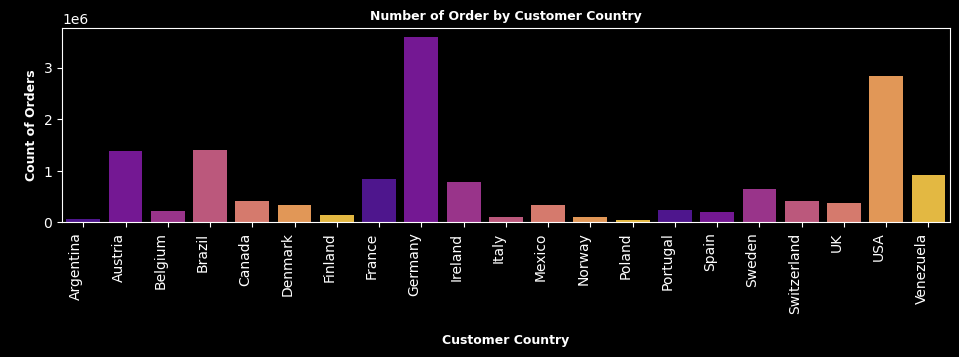

In [507]:
NumberofOrderDatesbyCustomerCountry = df.groupby('Customer Country')['Total Price'].sum()

plt.style.use('dark_background')
plt.figure(figsize=(10,3))
colors = sns.color_palette("plasma", n_colors=7)
ax = sns.barplot(x=NumberofOrderDatesbyCustomerCountry.index,y=NumberofOrderDatesbyCustomerCountry.values, palette=colors)
plt.title("Number of Order by Customer Country",fontsize=9,fontweight="bold")
plt.xlabel("\nCustomer Country", fontsize=9, fontweight="bold")
plt.ylabel("\nCount of Orders", fontsize=9, fontweight="bold")
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

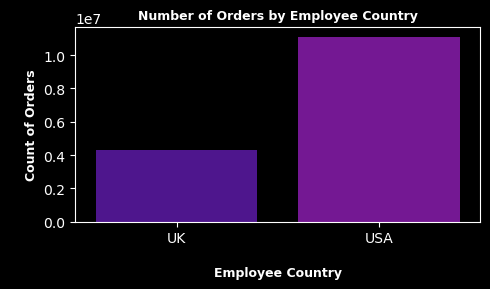

In [508]:
NumberofOrderDatesbyEmployeeCountry = df.groupby('Employee Country')['Total Price'].sum()

plt.style.use('dark_background')
plt.figure(figsize=(5,3))
colors = sns.color_palette("plasma", n_colors=7)
ax = sns.barplot(x=NumberofOrderDatesbyEmployeeCountry.index,y=NumberofOrderDatesbyEmployeeCountry.values, palette=colors)
plt.title("Number of Orders by Employee Country",fontsize=9,fontweight="bold")
plt.xlabel("\nEmployee Country", fontsize=9, fontweight="bold")
plt.ylabel("\nCount of Orders", fontsize=9, fontweight="bold")
plt.tight_layout()
plt.show()

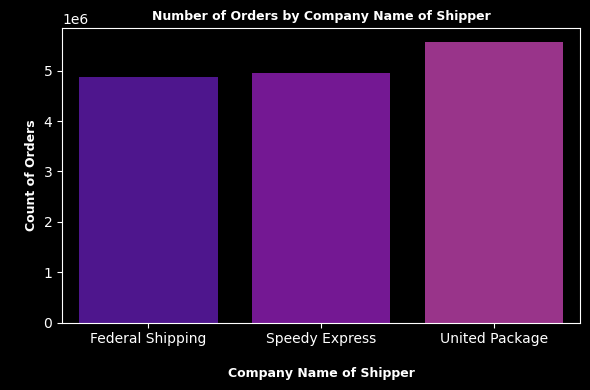

In [509]:
NumberofOrderDatesbyCompanyNameofShipper = df.groupby('Company Name of Shipper')['Total Price'].sum()

plt.style.use('dark_background')
plt.figure(figsize=(6,4))
colors = sns.color_palette("plasma", n_colors=7)
ax = sns.barplot(x=NumberofOrderDatesbyCompanyNameofShipper.index,y=NumberofOrderDatesbyCompanyNameofShipper.values, palette=colors)
plt.title("Number of Orders by Company Name of Shipper",fontsize=9,fontweight="bold")
plt.xlabel("\nCompany Name of Shipper", fontsize=9, fontweight="bold")
plt.ylabel("\nCount of Orders", fontsize=9, fontweight="bold")
plt.tight_layout()
plt.show()

In [512]:
df.groupby("Company Name of Shipper").agg({"Freight" : "sum"}).sort_values(by="Freight",ascending=False)

,Freight
Company Name of Shipper,
United Package,7241966
Federal Shipping,5282893
Speedy Express,4474802


In [517]:
df.head()

,Customer ID,Order ID,Order Date,Required Date,Shipped Date,Freight,Customer Company Name,Contact Name,Contact Title,Customer City,Customer Country,Unit Price from Order Details,Quantity,Discount,Employee Name,Employee Title,Employee City,Employee Country,Reports To,Product Name,Quantity Per Unit,Product of Unit Price,Discontinued,Company Name of Shipper,Category Name,Description,Year of Order Date,Month of Order Date,Day of Order Date,Year of Required Date,Month of Required Date,Day of Required Date,Year of Shipped Date,Month of Shipped Date,Day of Shipped Date,Total Price,Current Total Price,Month of Order Date2,Season
0,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,14,12,0,Steven Buchanan,Sales Manager,London,UK,2.0,Queso Cabrales,1 kg pkg.,21,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,168,252,4,Spring
1,VINET,10248,2013-04-07,2013-01-08,2013-07-16,3238,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,Reims,France,348,5,0,Steven Buchanan,Sales Manager,London,UK,2.0,Mozzarella di Giovanni,24 - 200 g pkgs.,348,0,Federal Shipping,Dairy Products,Cheeses,2013,April,Sunday,2013,January,Tuesday,2013.0,July,Tuesday,1740,1740,4,Spring
2,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,186,9,0,Michael Suyama,Sales Representative,London,UK,5.0,Tofu,40 - 100 g pkgs.,2325,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,1674,20925,5,Summer
3,TOMSP,10249,2013-05-07,2013-08-16,2013-10-07,1161,Toms Spezialitäten,Karin Josephs,Marketing Manager,Münster,Germany,424,40,0,Michael Suyama,Sales Representative,London,UK,5.0,Manjimup Dried Apples,50 - 300 g pkgs.,53,0,Speedy Express,Produce,Dried fruit and bean curd,2013,May,Tuesday,2013,August,Friday,2013.0,October,Monday,16960,2120,5,Summer
4,HANAR,10250,2013-08-07,2013-05-08,2013-12-07,6583,Hanari Carnes,Mario Pontes,Accounting Manager,Rio de Janeiro,Brazil,77,10,0,Margaret Peacock,Sales Representative,New York,USA,8.0,Jack's New England Clam Chowder,12 - 12 oz cans,965,0,United Package,Seafood,Seaweed and fish,2013,August,Wednesday,2013,May,Wednesday,2013.0,December,Saturday,770,9650,8,Fall


In [518]:
df["Order ID"].value_counts().sum()

1861

In [522]:
df["Order ID"].nunique()

795

In [578]:
df.groupby("Customer ID").agg({"Order ID" :"count"})

,Order ID
Customer ID,
ALFKI,10
ANATR,9
ANTON,14
AROUT,28
BERGS,45
...,...
WARTH,33
WELLI,17
WHITC,35


Calculating RFM Metrics

In [583]:
import datetime as dt

In [580]:
df_ = df.copy() 

In [594]:
df_["Customer ID"].value_counts().sum()

1861

In [581]:
print(df["Order Date"].max())

2015-12-03 00:00:00


In [584]:
today_date = dt.datetime(2015, 12, 5)
print(today_date)

2015-12-05 00:00:00


In [585]:
df.groupby('Customer ID').agg({'Order Date': lambda date: (today_date - date.max()).days}).head()

,Order Date
Customer ID,
ALFKI,92
ANATR,246
ANTON,311
AROUT,62
BERGS,186


In [595]:
rfm = df.groupby('Customer ID').agg({'Order Date': lambda date: (today_date - date.max()).days,
                                     'Order ID': lambda num: num.nunique(),
                                     'Total Price': lambda TotalPrice: TotalPrice.sum()}).astype(int)

In [597]:
rfm.head()

,Order Date,Order ID,Total Price
Customer ID,,,
ALFKI,92,6,68063
ANATR,246,4,12209
ANTON,311,7,147435
AROUT,62,13,100751
BERGS,186,18,457167


In [598]:
rfm.shape

(89, 3)

In [599]:
rfm.columns = ['Recency', 'Frequency','Monetary']

In [600]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 3, labels=[3, 2, 1])

In [601]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 3, labels=[1, 2, 3])

In [602]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3])

In [603]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
ALFKI,92,6,68063,3,2,2
ANATR,246,4,12209,1,1,1
ANTON,311,7,147435,1,2,2
AROUT,62,13,100751,3,3,2
BERGS,186,18,457167,2,3,3


In [604]:
pd.crosstab(rfm["Frequency"],rfm["FrequencyScore"])

FrequencyScore,1,2,3
Frequency,,,
1,1,0,0
2,5,0,0
3,4,0,0
4,7,0,0
5,13,0,0
6,0,7,0
7,0,5,0
8,0,4,0
9,0,6,0


In [605]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [606]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
ALFKI,92,6,68063,3,2,2,322
ANATR,246,4,12209,1,1,1,111
ANTON,311,7,147435,1,2,2,122
AROUT,62,13,100751,3,3,2,332
BERGS,186,18,457167,2,3,3,233


In [607]:
rfm['RecencyScore'].value_counts()

3    31
2    29
1    29
Name: RecencyScore, dtype: int64

In [608]:
rfm['RFM_SCORE'].value_counts()

111    15
333     9
233     8
332     6
223     5
211     5
222     4
312     4
322     4
122     4
311     3
123     3
221     3
321     3
133     3
232     3
112     2
323     2
212     1
132     1
121     1
Name: RFM_SCORE, dtype: int64

In [609]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [610]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
ALFKI,92,6,68063,3,2,2,322,32
ANATR,246,4,12209,1,1,1,111,11
ANTON,311,7,147435,1,2,2,122,12
AROUT,62,13,100751,3,3,2,332,33
BERGS,186,18,457167,2,3,3,233,23


In [611]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
df[["Customer ID"]].nunique()

Customer ID    89
dtype: int64

In [616]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
ALFKI,92,6,68063,3,2,2,322,About_to_Sleep
ANATR,246,4,12209,1,1,1,111,Hibernating
ANTON,311,7,147435,1,2,2,122,Hibernating
AROUT,62,13,100751,3,3,2,332,Need_Attention
BERGS,186,18,457167,2,3,3,233,At_Risk
...,...,...,...,...,...,...,...,...
WARTH,234,14,114000,2,3,2,232,At_Risk
WELLI,93,9,13515,3,2,1,321,About_to_Sleep
WHITC,232,14,302015,2,3,3,233,At_Risk


In [615]:
rfm["Segment"].value_counts()

Hibernating       43
About_to_Sleep    16
Need_Attention    15
At_Risk           15
Name: Segment, dtype: int64

In [617]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"]

In [618]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,
ALFKI,92,6,68063,3,2,2,322,About_to_Sleep,11343.833333
ANATR,246,4,12209,1,1,1,111,Hibernating,3052.250000
ANTON,311,7,147435,1,2,2,122,Hibernating,21062.142857
AROUT,62,13,100751,3,3,2,332,Need_Attention,7750.076923
BERGS,186,18,457167,2,3,3,233,At_Risk,25398.166667


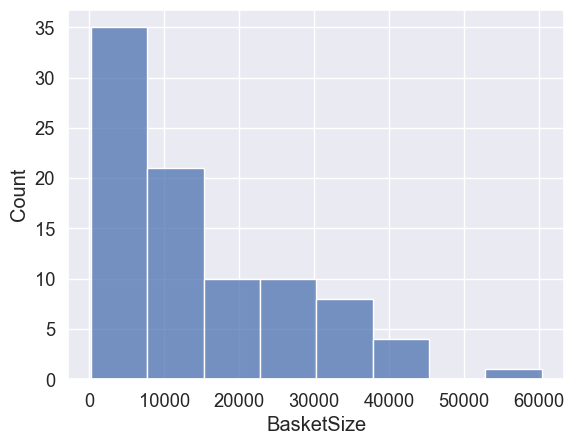

In [619]:
sns.set_theme(font_scale=1.2)
sns.histplot(x=rfm["BasketSize"]);

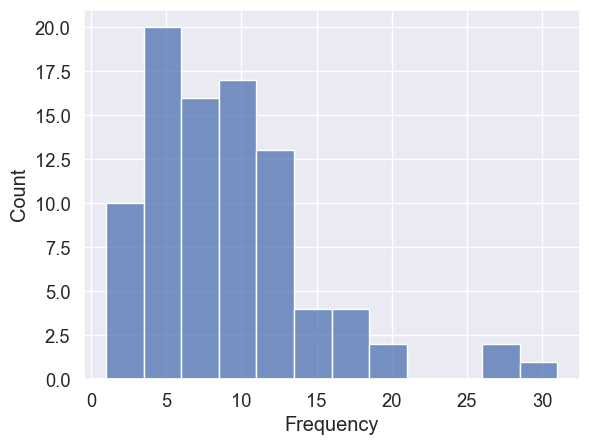

In [620]:
sns.set_theme(font_scale=1.2)
sns.histplot(x=rfm["Frequency"]);

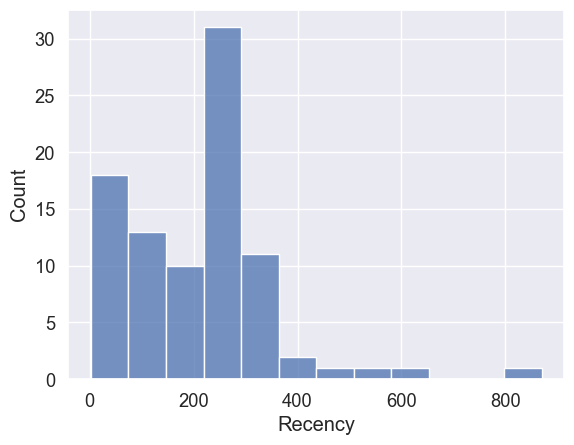

In [621]:
sns.set_theme(font_scale=1.2) 
sns.histplot(x=rfm["Recency"]);

CLUSTER - K-MEANS

In [622]:
import argparse
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [623]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,
ALFKI,92,6,68063,3,2,2,322,About_to_Sleep,11343.833333
ANATR,246,4,12209,1,1,1,111,Hibernating,3052.250000
ANTON,311,7,147435,1,2,2,122,Hibernating,21062.142857
AROUT,62,13,100751,3,3,2,332,Need_Attention,7750.076923
BERGS,186,18,457167,2,3,3,233,At_Risk,25398.166667


In [624]:
cluster_data= rfm[["RecencyScore", "FrequencyScore", "MonetaryScore"]]

In [626]:
cluster_data.shape

(89, 3)

91.00203252032516
64.81481481481482
46.49406487232575
38.32702472293265
31.990908029878614
29.186182476943344
23.917712842712845
21.031565656565654
17.853174603174605
15.51897546897547


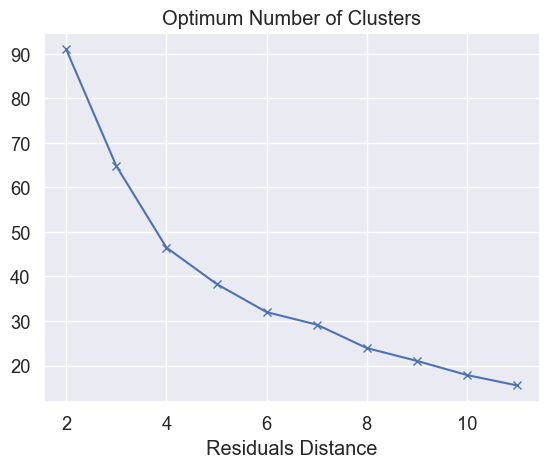

In [627]:
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(cluster_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)


plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

In [629]:
kmeans = KMeans(n_clusters=5).fit(cluster_data)

In [630]:
cluster_data["clusters"] = kmeans.labels_

In [631]:
cluster_data["clusters"].value_counts()

1    23
4    19
2    17
3    15
0    15
Name: clusters, dtype: int64

RFM & K-Means Joining

In [632]:
segmentation = rfm[["Segment"]].merge(cluster_data, on="Customer ID")

In [633]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,clusters
Customer ID,,,,,
ALFKI,About_to_Sleep,3,2,2,3
ANATR,Hibernating,1,1,1,1
ANTON,Hibernating,1,2,2,0
AROUT,Need_Attention,3,3,2,2
BERGS,At_Risk,2,3,3,4


In [634]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4
Segment,,,,,
About_to_Sleep,0,0,2,14,0
At_Risk,4,0,0,0,11
Hibernating,11,23,0,1,8
Need_Attention,0,0,15,0,0
